In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

## Outlier Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

df1=pd.read_csv('data/stock_profit.csv')[['code','npMargin','netProfit','MBRevenue','epsTTM','totalShare','liqaShare']]
df2=pd.read_csv('data/stock_growth.csv')[['code','YOYEquity','YOYEPSBasic','YOYNI']]
df3=pd.read_csv('data/stock_balance.csv')[['code','liabilityToAsset','currentRatio','assetToEquity','YOYLiability']]
df4=pd.read_csv('data/stock_dupont.csv')[['code','dupontAssetTurn']]
df5=pd.read_csv('data/stock_industry.csv', encoding='GBK')[['code','code_name','industry']]
df6=pd.read_csv('data/stock_k_data(2024_01_02).csv')[['code','open','volume']]

df=pd.merge(df1,df2,on='code')
df=pd.merge(df,df3,on='code')
df=pd.merge(df,df4,on='code')
df=pd.merge(df,df5,on='code')
df=pd.merge(df,df6,on='code')
df=df[df['industry']=='医药生物']
df7=pd.read_csv('data/stock_k_data(2023_09_01).csv')[['code','open','volume']]
df7.rename(columns={
    'open': 'open_91',
    'volume': 'volume_91'
}, inplace=True)
df=pd.merge(df,df7,on='code')
df['open_dif']=df['open']-df['open_91']
df['volume_dif']=df['volume']-df['volume_91']
df=df.dropna().reset_index(drop=True)

In [2]:
columns_outliers=['npMargin', 'netProfit', 'epsTTM', 'totalShare','liqaShare','YOYEquity','MBRevenue','YOYNI',
       'YOYEPSBasic', 'liabilityToAsset', 'currentRatio', 'assetToEquity',
       'YOYLiability', 'dupontAssetTurn','open_dif','volume_dif']
X_ = df[columns_outliers]
scaler = StandardScaler()
X_ = pd.DataFrame(scaler.fit_transform(X_),columns = X_.columns)

In [3]:
def remove_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 3  # 可调整阈值
    return abs(series - mean) <= threshold * std
outliers=X_[-X_.apply(remove_outliers).all(axis=1)]

In [4]:
outliers.head()

,npMargin,netProfit,epsTTM,totalShare,liqaShare,YOYEquity,MBRevenue,YOYNI,YOYEPSBasic,liabilityToAsset,currentRatio,assetToEquity,YOYLiability,dupontAssetTurn,open_dif,volume_dif
16,0.036748,-0.346408,-0.335166,-0.489073,-0.509475,-0.068775,-0.295441,0.078214,0.072272,1.202688,-0.559520,0.663216,0.235516,0.673860,-0.562178,-3.013017
17,0.328814,3.240750,0.025474,5.030561,5.358799,-0.044410,0.901473,0.083085,0.100330,-1.419329,2.130228,-0.741625,-1.098362,0.077647,0.229843,-0.036696
20,0.061399,3.225093,1.305673,0.754815,0.667060,-0.023307,3.848449,0.077136,0.077783,1.153222,-0.515798,0.609997,-0.116255,1.433981,-0.341451,0.098860
25,0.524686,2.032831,2.812290,-0.164950,-0.090836,0.077621,0.213946,0.083522,0.104475,-0.751304,0.396706,-0.540632,0.230481,0.390447,-3.551484,-0.114444
28,0.042161,1.595387,1.551615,-0.028951,-0.138025,-0.000379,2.417637,0.081864,0.094927,0.751057,-0.394631,0.243468,0.075250,3.267504,-0.513238,-0.002253


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


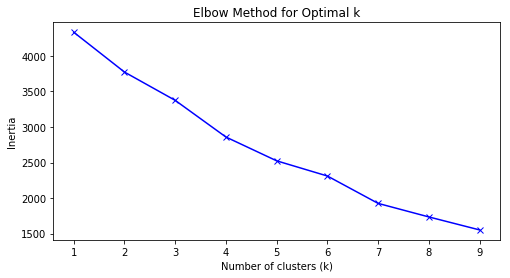

In [5]:
# 使用肘部法则选择适当的聚类数目
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(outliers)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(outliers)
outliers['Cluster'] = kmeans.labels_

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
len(outliers)

57

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
d:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
d:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

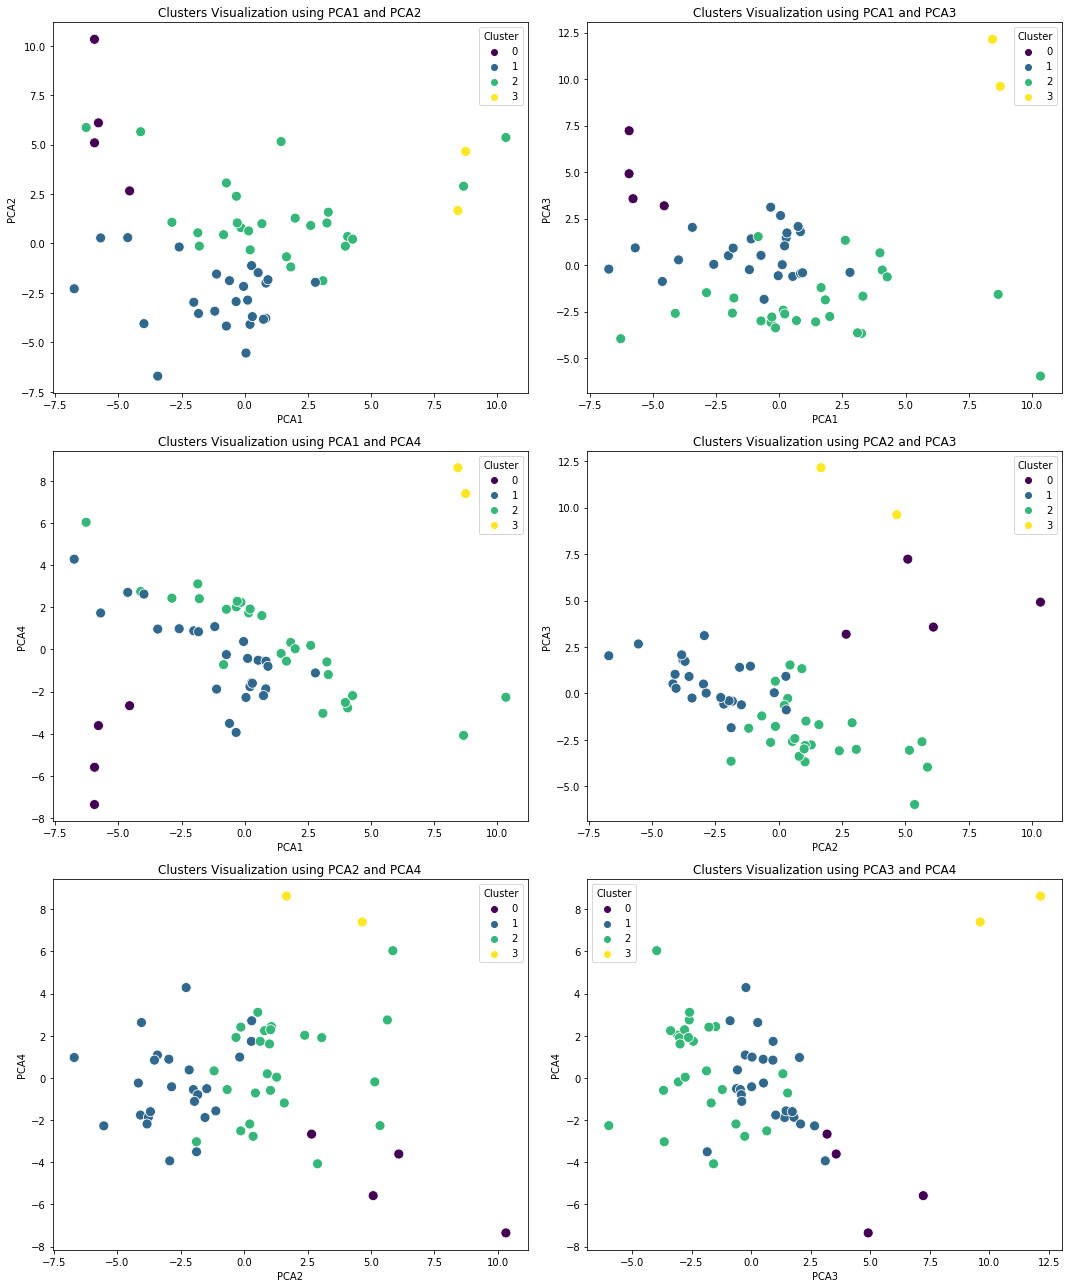

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
# 假设 scaled_outlier 已经存在且已预处理

# 执行PCA生成4个组件
pca = PCA(n_components=4)
pca_data = pca.fit_transform(outliers.drop(columns=['Cluster']))
outliers['PCA1'] = pca_data[:, 0]
outliers['PCA2'] = pca_data[:, 1]
outliers['PCA3'] = pca_data[:, 2]
outliers['PCA4'] = pca_data[:, 3]

# 生成所有两两组合的图
combinations_of_pca = list(combinations(['PCA1', 'PCA2', 'PCA3','PCA4'], 2))

# 设置绘图的子图网格大小
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 遍历所有组合并绘制子图
for (ax, (pca_x, pca_y)) in zip(axes.flatten(), combinations_of_pca):
    sns.scatterplot(data=outliers, x=pca_x, y=pca_y, hue='Cluster', palette='viridis', s=100, ax=ax)
    ax.set_title(f'Clusters Visualization using {pca_x} and {pca_y}')

# 调整子图布局
plt.tight_layout()
plt.show()

In [8]:
components = pca.components_

# 打印PCA1和PCA2的成分
print("PCA1 components:\n", components[0])
print("PCA2 components:\n", components[1])
print("PCA3 components:\n", components[2])
print("PCA4 components:\n", components[3])

PCA1 components:
 [-0.42946811 -0.43925783 -0.34560844 -0.29307672 -0.2815113   0.05200128
 -0.27515381 -0.27428228 -0.26884348  0.08867441 -0.02454434  0.18275122
 -0.03555828 -0.16042832  0.06625504 -0.19709296]
PCA2 components:
 [-0.2342781  -0.02882952 -0.32261699  0.44774381  0.43655256 -0.08744398
  0.29066042 -0.10017352 -0.16309549  0.2471794  -0.31007086  0.29622238
 -0.13922447  0.13826587  0.10928052  0.15795892]
PCA3 components:
 [ 0.13610861  0.00797576  0.01383278  0.21293232  0.22507239 -0.15523412
 -0.23685868 -0.49901099 -0.40568967 -0.26999455  0.2040431  -0.33264958
 -0.03105914 -0.26191033 -0.05350656  0.30629228]
PCA4 components:
 [ 0.15910753  0.2659815   0.26237808 -0.25833285 -0.28592963 -0.12634841
  0.38138506 -0.43409689 -0.39163523  0.11457918 -0.20593896  0.05821324
 -0.09465749  0.30799568 -0.01683341 -0.14260172]


In [9]:
for j in range(4):
    indices = [i for i, x in enumerate(components[j]) if abs(x) > 0.3]
    weight=[x for i, x in enumerate(components[j]) if abs(x) > 0.3]
    print(indices,weight)
    selected_columns = outliers.columns[indices]
    result_table = pd.DataFrame({'Selected "Columns': selected_columns})
    print(result_table)

[0, 1, 2] [-0.4294681134489551, -0.43925782727971474, -0.3456084376425014]
  Selected "Columns
0          npMargin
1         netProfit
2            epsTTM
[2, 3, 4, 10] [-0.32261698724578625, 0.44774381291941734, 0.43655256303688944, -0.3100708592294288]
  Selected "Columns
0            epsTTM
1        totalShare
2         liqaShare
3      currentRatio
[7, 8, 11, 15] [-0.49901099458994785, -0.4056896695943279, -0.33264958419545726, 0.30629227853258356]
  Selected "Columns
0             YOYNI
1       YOYEPSBasic
2     assetToEquity
3        volume_dif
[6, 7, 8, 13] [0.38138505779012455, -0.43409688863034074, -0.39163523248421206, 0.307995684732827]
  Selected "Columns
0         MBRevenue
1             YOYNI
2       YOYEPSBasic
3   dupontAssetTurn


PCA1：销售净利率(-)、净利润(-)、每股收益(-) \
PCA2：每股收益(-)、总股本(-)、 流通股本(+)、流动比率(-)\
PCA3：净利润同比增长率(-)、基本每股收益同比增长率(-)、权益乘数(-)、成交量上升(+)   \
PCA4: 主营营业收入(+)、净利润同比增长率(-)、基本每股收益同比增长率(-)、总资产周转率(+) 


In [10]:
# 获取解释方差
explained_variance = pca.explained_variance_

# 获取解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 输出结果
for i, (var, ratio) in enumerate(zip(explained_variance, explained_variance_ratio), start=1):
    print(f"主成分{i}: 解释方差 = {var:.4f}, 解释方差比例 = {ratio:.4f}")

主成分1: 解释方差 = 14.0170, 解释方差比例 = 0.1811
主成分2: 解释方差 = 10.9420, 解释方差比例 = 0.1414
主成分3: 解释方差 = 10.2204, 解释方差比例 = 0.1321
主成分4: 解释方差 = 8.4928, 解释方差比例 = 0.1097


In [14]:
df8=pd.read_csv('data/stock_k_data(2024_04_01).csv')[['code','open','volume']]
df8.rename(columns={
    'open': 'open_41',
    'volume': 'volume_41'
}, inplace=True)
selected_result=pd.merge(df,df8,on='code')
selected_result['open_diff_4_1']=selected_result['open_41']-selected_result['open']

In [12]:
big_company_index=outliers[(outliers['PCA1']>10)].index

In [13]:
selected_result.loc[big_company_index][['code_name','open_diff_4_1']]

,code_name,open_diff_4_1
251,*ST太安,-1.31


In [31]:
potential_company_index=outliers[(outliers['PCA1']<0.5)&(outliers['PCA2']<0)&(outliers['PCA3']<0)&(outliers['PCA4']>0)].index

In [32]:
selected_result.loc[potential_company_index][['code_name','open_diff_4_1']]


,code_name,open_diff_4_1
28,国药股份,4.50
142,奕瑞科技,-105.43
169,惠泰医疗,40.81
372,迈瑞医疗,-9.14
379,药易购,-6.83


In [23]:
selected_result[selected_result['open_diff_4_1']>0].head()

,code,npMargin,netProfit,MBRevenue,epsTTM,totalShare,liqaShare,YOYEquity,YOYEPSBasic,YOYNI,...,industry,open,volume,open_91,volume_91,open_dif,volume_dif,open_41,volume_41,open_diff_4_1
2,sh.600062,0.129710,1.325908e+09,1.011376e+10,1.282080,1.039740e+09,1.021061e+09,0.050582,0.140927,0.074783,...,医药生物,18.65,9278487.0,16.10,4940908.0,2.55,4337579.0,20.65,7682161.0,2.00
9,sh.600200,-0.033239,-7.445481e+07,2.224200e+09,-0.101006,7.122858e+08,7.095581e+08,-0.033065,0.090909,0.049312,...,医药生物,8.25,32080342.0,7.50,6794809.0,0.75,25285533.0,11.44,82308012.0,3.19
17,sh.600276,0.187461,4.277821e+09,2.237719e+10,0.674468,6.379002e+09,6.374208e+09,0.069857,0.114754,0.121274,...,医药生物,45.24,18260797.0,41.85,16531303.0,3.39,1729494.0,45.98,20222435.0,0.74
18,sh.600285,0.171560,5.681157e+08,3.307500e+09,1.001702,5.671440e+08,5.631872e+08,0.094176,0.210526,0.220953,...,医药生物,17.18,11110643.0,16.14,5120439.0,1.04,5990204.0,21.43,8689550.0,4.25
20,sh.600332,0.056403,4.259328e+09,7.527487e+10,2.494588,1.625791e+09,1.405891e+09,0.089011,0.022541,0.001401,...,医药生物,28.61,7090507.0,30.94,3403375.0,-2.33,3687132.0,28.86,7454310.0,0.25


In [24]:
selected_result.loc[outliers.index][selected_result['open_diff_4_1']>1][['code_name','open_diff_4_1']]

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,code_name,open_diff_4_1
28,国药股份,4.50
62,九州通,1.05
115,诺泰生物,8.11
156,硕世生物,13.92
169,惠泰医疗,40.81
181,国药一致,1.72
194,云南白药,1.20
378,爱美客,52.78


In [34]:
outliers.loc[selected_result.loc[outliers.index][selected_result['open_diff_4_1']>1][['code_name','open_diff_4_1']].index]\
    [['Cluster','PCA1','PCA2','PCA3','PCA4']]

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Cluster,PCA1,PCA2,PCA3,PCA4
28,2,-1.794200,-0.131646,-1.771791,2.408849
62,2,-4.116427,5.652671,-2.596376,2.748992
115,1,0.922372,-1.831397,-0.412503,-0.798790
156,2,3.985276,-0.135360,0.658027,-2.514425
169,1,-1.182443,-3.424027,-0.246454,1.084677
181,2,-1.856045,0.538828,-2.583793,3.111357
194,1,-2.591710,-0.176744,0.039226,0.985857
378,1,-3.440978,-6.707910,2.028333,0.968259


In [48]:
selected_result.loc[outliers.index][selected_result['open_diff_4_1']>1][['code_name','open_diff_4_1']].count()

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


code_name        9
open_diff_4_1    9
dtype: int64